# Progagation of Extreme Events

In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib notebook

## Master

In [2]:
def exev_ode(z, t, k, a=-0.025794, b1=0.0065, b2=0.0135, c=0.02):
    
    zz = [0, 0, 0, 0]
    
    zz[0] = z[0]*(a-z[0])*(z[0]-1) - z[1] + k*(z[2]-z[0])
    zz[1] = b1*z[0] - c*z[1]    
    zz[2] = z[2]*(a-z[2])*(z[2]-1) - z[3] + k*(z[0]-z[2])    
    zz[3] = b2*z[2] - c*z[3]
    
    return zz

## Signal

In [3]:
def signal_ode(z, t, s, k=0.05, τ=20):
    
    zz = -z/τ + k*s
    
    return zz

## Slave

In [4]:
def foraging_ode(z, t, s, k=0.01, ϵ1=1000, ϵ2=0.05, c=1.5, a=0.35):
    
    zz = [0, 0, 0, 0]
    
    zz[0] = (z[0] - (z[0]**3)/3 - c*z[1] - a + k*(z[2]-z[0]) + s)/(ϵ1*ϵ2)
    zz[1] = (z[0] - c*z[1])/(ϵ1)
    
    zz[2] = (z[2] - (z[2]**3)/3 - c*z[3] - a + k*(z[0]-z[2]))/(ϵ1*ϵ2)
    zz[3] = (z[2] - c*z[3])/(ϵ1)

    
    return zz

## Solving ODE

In [5]:
def ode_solver(func, tf, dt, z_init, args, args_array_flag=False):
    
    times = np.arange(0, tf, dt)
    data = np.zeros((int(tf/dt), len(z_init)))
    
    z = z_init
    
    index = 0
    
    for time in tqdm(times, desc=str(func)):
        if args_array_flag:
            sol = sci.odeint(func, z, [time, time+dt], args=(args[index], ))
        else:
            sol = sci.odeint(func, z, [time, time+dt], args=args)
        z = list(sol[-1])
        data[index] = z
        index+=1
    
    return data

In [6]:
tf = 200000
dt = 1

exev_th = 0.8

times = np.arange(0, tf, dt)
master = ode_solver(exev_ode, tf, dt, list(np.random.random(4)), (0.1281, ))
λ = np.array(((master[:,0]+master[:,2])/2) > exev_th)

<function exev_ode at 0x7f84a88b22f0>: 100%|██████████| 200000/200000 [01:09<00:00, 2893.69it/s]


In [7]:
signal = ode_solver(signal_ode, tf, dt, [0], λ, True)

<function signal_ode at 0x7f847ed890d0>: 100%|██████████| 200000/200000 [00:20<00:00, 9888.42it/s] 


In [8]:
slave = ode_solver(foraging_ode, tf, dt, list(np.random.random(4)), λ, True)

<function foraging_ode at 0x7f84a88b2048>: 100%|██████████| 200000/200000 [01:01<00:00, 3273.40it/s]


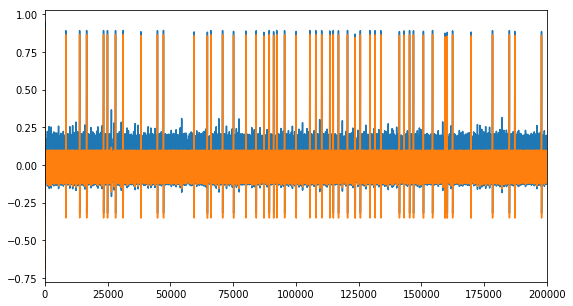

In [9]:
plt.figure(figsize=(9,5))
plt.plot(times, master[:,0])
plt.plot(times, master[:,2])
plt.xlim((0,tf))
plt.show()

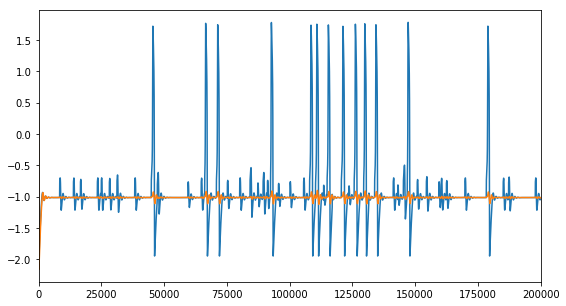

In [10]:
plt.figure(figsize=(9,5))
plt.plot(times, slave[:,0])
plt.plot(times, slave[:,2])
plt.xlim((0,tf))
plt.show()

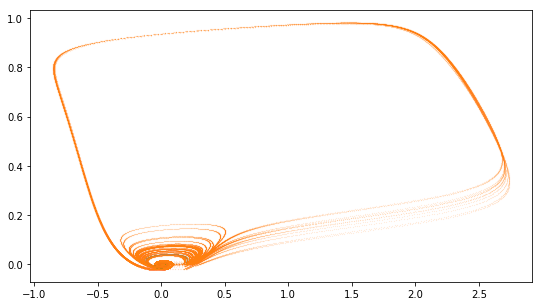

In [11]:
plt.figure(figsize=(9,5))
start_point = 143000
end_point = 145000
# plt.plot(slave[start_point:end_point,0], slave[start_point:end_point,1], '.')
# plt.plot(slave[start_point:end_point,2], slave[start_point:end_point,3], '.')
plt.plot(slave[start_point:end_point,0]-slave[start_point:end_point,2], slave[start_point:end_point,1]-slave[start_point:end_point,3], '.', ms=0.1)

start_point = 20000
end_point = 200000
# start_point = 123000
# end_point = 125000
# plt.plot(slave[start_point:end_point,0], slave[start_point:end_point,1], '.')
# plt.plot(slave[start_point:end_point,2], slave[start_point:end_point,3], '.')
plt.plot(slave[start_point:end_point,0]-slave[start_point:end_point,2], slave[start_point:end_point,1]-slave[start_point:end_point,3], '.', ms=0.1)

# plt.xlim((-0.7, -0.5))
# plt.ylim((0.0, 0.2))

plt.show()

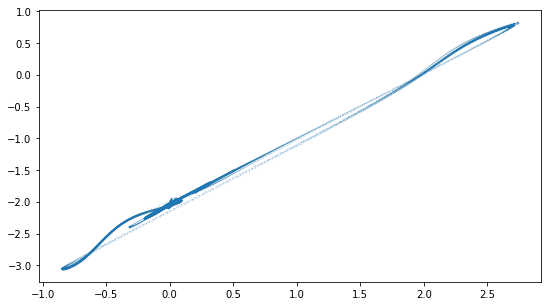

In [12]:
plt.figure(figsize=(9,5))
transience = 100000
plt.plot(slave[transience:,0]-slave[transience:,2], slave[transience:,0]+slave[transience:,2], '.', ms=0.1)
# plt.xlim((-1,1))
# plt.ylim((-4,-1))
plt.show()